# <center>Network Science</center>

Home Assignment #3: Epidemic Models

#### <hr /> General Information

**Due Date:** 11.06.2020 21:00 <br>
**Late submission policy:** -1 points per day <br>


Please send your reports to <iakarpov@hse.ru> with message subject of the following structure: <br>
**[HSE SNA Magolego 2020] *{LastName}* *{First Name}* HW_3*

Support your computations with figures and comments. <br>
If you are using IPython Notebook you may use this file as a starting point of your report.

## Problems

### Task 1. Epidemic modelling

Use any existing network from our [classes](https://dl.dropboxusercontent.com/s/8eo1sjfhu5spb0f/vk.tsv?dl=1)  or your couse project

1.1. Using Seminar examples or [ndlib](https://ndlib.readthedocs.io/en/latest/reference/reference.html) implement one of the possible models (SI, SIS, SIR, SEIR, SEIS, SWIR, Threshold, Generalised Threshold, Kertesz Threshold, Independent Cascades) to model epidemics in given network<br>


In [1]:
!pip install ndlib
!pip install bokeh

     |████████████████████████████████| 81kB 759kB/s eta 0:00:011
     |████████████████████████████████| 2.4MB 2.0MB/s eta 0:00:01    |▊                               | 51kB 722kB/s eta 0:00:04     |███████████████████             | 1.4MB 115kB/s eta 0:00:09


In [3]:
pip install ndlib

  Using cached https://files.pythonhosted.org/packages/b1/53/e67c807a44f78e6deb4350ddd9944ac7766a8efb215df9f0c439785d992f/ndlib-5.0.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/50/a3/d3c46a783897cc08f53fce975ca8537734b422d6a4d5f3feb2349c20cb6e/python_igraph-0.8.2-cp37-cp37m-macosx_10_6_intel.whl
  Using cached https://files.pythonhosted.org/packages/e7/54/e7c6d0c14f00f23de9b20843f8a5709413961fa041899428d604b6b87785/netdispatch-0.0.5-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b1/bb/aee9c3e845ad0eb1209a3495f942e5ad3cd8ffb56326253d35da891f24d3/dynetx-0.2.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ec/b1/8a1c659ce288bf771d5b1c7cae318ada466f73bd0e16df8d86f27a2a3ee7/texttable-1.6.2-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from ndlib.viz.bokeh.MultiPlot import MultiPlot

from bokeh.io import output_notebook,show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp

from numpy.linalg import eig
from scipy.integrate import odeint
%matplotlib inline

In [42]:
vm=MultiPlot()

df=pd.read_csv('facebook_filtered.csv')

G=nx.from_pandas_edgelist(df,create_using=nx.DiGraph())

In [43]:
source = list(df["source"].unique())
source

[1434718420168101,
 1665475640372569,
 1771918009696789,
 173114043110529,
 177180216586,
 1523988594558139,
 546231398738792,
 136350979868732,
 324972640980935,
 348652681990328,
 1410303885890841,
 1450509088513365,
 286719031514115,
 1446198812328110,
 433298283464889,
 394942800711706,
 1491832504432634,
 418411318291557,
 1032514356827389,
 678611175595348,
 361211300737703,
 184965851626244,
 232033483650773,
 1576760982535461,
 272405262919902,
 185763051803257,
 491296934297163,
 1572083586394840,
 779419745443443,
 497765510280447,
 810396212321951,
 733494220165035,
 1737639483151381,
 120339624707766,
 496396187159321,
 486971034765788,
 1688567114693704,
 1438420163041767,
 1087042964648329,
 379858815451847,
 195837200621361,
 189036487934741,
 186203135084624,
 328444244204043,
 340132236082973,
 1669631433249366,
 566521823508110,
 271024703045419,
 839476106116331,
 1446046472280130,
 672535339459647,
 176104879174683,
 454899054662681,
 256491687864034,
 1044425392269

# 1 способ

In [44]:
#SIS Model
model=ep.SISModel(G)
config=mc.Configuration()

infected_nodes=[ 286719031514115, 173114043110529, 418411318291557, 1438420163041767, 256491687864034, 411019432279719, 143750132417681, 934612473264174  ]

config.add_model_parameter("beta",0.05)
config.add_model_parameter("lambda",0.01)
config.add_model_parameter("fraction_infected",0.05)

config.add_model_initial_configuration("Infected",infected_nodes)

  
model.set_initial_status(config)
iterations=model.iteration_bunch(10)
print(model.get_info())

trends=model.build_trends(iterations)
#diffusion trend
p1=DiffusionTrend(model,trends).plot(width=400,height=400)

vm.add_plot(p1)

m=vm.plot()


output_notebook()
show(m)

100%|██████████| 10/10 [00:00<00:00, 82.98it/s]

{'beta': 0.05, 'lambda': 0.01, 'fraction_infected': 0.05, 'tp_rate': 1}


Loading BokehJS ...

beta представляет вероятность передачи заболевания между восприимчивым и инфекционным человеком
На рисунке выше показано, что при уровне beta 0,05 инфекция передается достаточно быстро, что приводит к негативным последствиям

In [45]:
#SIS Model
model=ep.SISModel(G)
config=mc.Configuration()

infected_nodes=[ 286719031514115, 173114043110529, 418411318291557, 1438420163041767, 256491687864034, 411019432279719, 143750132417681, 934612473264174  ]

config.add_model_parameter("beta",0.01)
config.add_model_parameter("lambda",0.01)
config.add_model_parameter("fraction_infected",0.05)

config.add_model_initial_configuration("Infected",infected_nodes)

  
model.set_initial_status(config)
iterations=model.iteration_bunch(10)
print(model.get_info())

trends=model.build_trends(iterations)
#diffusion trend
p1=DiffusionTrend(model,trends).plot(width=400,height=400)

vm.add_plot(p1)

m=vm.plot()


output_notebook()
show(m)

100%|██████████| 10/10 [00:00<00:00, 51.63it/s]


{'beta': 0.01, 'lambda': 0.01, 'fraction_infected': 0.05, 'tp_rate': 1}


Loading BokehJS ...

При изменении параметра beta мы наблюдаем изменение скорости распространения вируса и восприимчивости. С уменьшением паратметра beta снижается скорость заражения.

In [46]:
#SIS Model
model=ep.SISModel(G)
config=mc.Configuration()

infected_nodes=[ 286719031514115, 173114043110529, 418411318291557, 1438420163041767, 256491687864034, 411019432279719, 143750132417681, 934612473264174  ]

config.add_model_parameter("beta",0.7)
config.add_model_parameter("lambda",0.01)
config.add_model_parameter("fraction_infected",0.05)

config.add_model_initial_configuration("Infected",infected_nodes)

  
model.set_initial_status(config)
iterations=model.iteration_bunch(10)
print(model.get_info())

trends=model.build_trends(iterations)
#diffusion trend
p1=DiffusionTrend(model,trends).plot(width=400,height=400)

vm.add_plot(p1)

m=vm.plot()


output_notebook()
show(m)

100%|██████████| 10/10 [00:00<00:00, 75.49it/s]

{'beta': 0.7, 'lambda': 0.01, 'fraction_infected': 0.05, 'tp_rate': 1}


Loading BokehJS ...

При увеличении параметра beta скорость заражения растет, однако интересно то, что незначительное снижение парметра beta привело к значительно большему снижению скорости заражения, чем значительное увеличение параметра beta

In [47]:
#SIS Model
model=ep.SISModel(G)
config=mc.Configuration()

infected_nodes=[ 286719031514115, 173114043110529, 418411318291557, 1438420163041767, 256491687864034, 411019432279719, 143750132417681, 934612473264174  ]

config.add_model_parameter("beta",0.05)
config.add_model_parameter("lambda",0.05)
config.add_model_parameter("fraction_infected",0.01)

config.add_model_initial_configuration("Infected",infected_nodes)

  
model.set_initial_status(config)
iterations=model.iteration_bunch(10)
print(model.get_info())

trends=model.build_trends(iterations)
#diffusion trend
p1=DiffusionTrend(model,trends).plot(width=400,height=400)

vm.add_plot(p1)

m=vm.plot()


output_notebook()
show(m)

100%|██████████| 10/10 [00:00<00:00, 50.75it/s]


{'beta': 0.05, 'lambda': 0.05, 'fraction_infected': 0.01, 'tp_rate': 1}


Loading BokehJS ...

In [48]:
#SIR
model=ep.SIRModel(G)
config=mc.Configuration()

infected_nodes= [ 286719031514115, 173114043110529, 418411318291557, 1438420163041767, 256491687864034, 411019432279719, 143750132417681, 934612473264174  ]

config.add_model_parameter("beta",0.05)
config.add_model_parameter("gamma",0.1)
config.add_model_parameter("fraction_infected",1)

config.add_model_initial_configuration("Infected",infected_nodes)

  
model.set_initial_status(config)
iterations=model.iteration_bunch(10)
print(model.get_info())

trends=model.build_trends(iterations)
#diffusion trend
p1=DiffusionTrend(model,trends).plot(width=400,height=400)

vm.add_plot(p1)

m=vm.plot()
output_notebook()
show(m)

100%|██████████| 10/10 [00:00<00:00, 63.52it/s]


{'beta': 0.05, 'gamma': 0.1, 'fraction_infected': 1, 'tp_rate': 1}


Loading BokehJS ...

In [49]:
model=ep.SIRModel(G)
config=mc.Configuration()

infected_nodes= [ 286719031514115, 173114043110529, 418411318291557, 1438420163041767, 256491687864034, 411019432279719, 143750132417681, 934612473264174  ]

config.add_model_parameter("beta",0.05)
config.add_model_parameter("gamma",1)
config.add_model_parameter("fraction_infected",1)

config.add_model_initial_configuration("Infected",infected_nodes)

  
model.set_initial_status(config)
iterations=model.iteration_bunch(10)
print(model.get_info())

trends=model.build_trends(iterations)
#diffusion trend
p1=DiffusionTrend(model,trends).plot(width=400,height=400)

vm.add_plot(p1)

m=vm.plot()
output_notebook()
show(m)

100%|██████████| 10/10 [00:00<00:00, 56.02it/s]


{'beta': 0.05, 'gamma': 1, 'fraction_infected': 1, 'tp_rate': 1}


Loading BokehJS ...

Ранее мы посмотрели на что влияет параметр бета, теперь рассмотрим, как изменяется график при изменении gamma. 
Gamma- это коэффициент выздоровления, который показывает сколько в среднем болеют. 
Увеличение параметра gamma приводит к тому, что точка разворота кривой Infected становится ниже, то есть быстрее происходит выздоровление и восстановление населения, снижается уровень зараженных

# 2 способ

In [50]:
# Let's start from a complete graph
n = 50
G = nx.watts_strogatz_graph(n, 5, 0.4)

# Get adj. matrix
A = np.array(nx.adjacency_matrix(G).todense())

# Spreading\restoring coefficient
beta, gamma = 0.03, 0.2

# Time domain
t = np.arange(0,5,0.05)

# Initial state
idx = np.random.choice(range(n), 5)
i0 = np.zeros((n,))
i0[idx] = 1
# i0 = np.random.random_integers(0,1,[n,])
z0 = np.concatenate((1-i0,i0))

# System of differential equations..
def sis(z, t, A, n, beta, gamma):
    return np.concatenate((
        -beta * z[0:n] * A.dot(z[n:2*n]) + gamma * z[n:2*n],
         beta * z[0:n] * A.dot(z[n:2*n]) - gamma * z[n:2*n]))
        

# ..Solved
z = odeint(sis, z0, t, (A, n, beta, gamma))

Text(0.5, 1.0, 'Probability for all nodes')

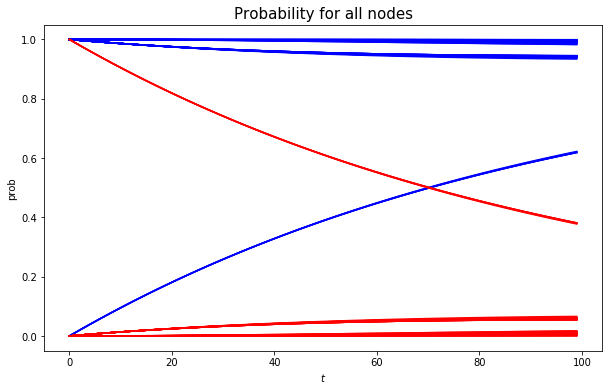

In [51]:
# Plot probs for some node
nId = 6
s = z[:,0:n]
x = z[:,n:2*n]

fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(s,color = 'blue')
ax.plot(x,color = 'red')
ax.set_xlabel('$t$')
ax.set_ylabel('prob')
ax.set_title('Probability for all nodes', fontsize = 15)

### Task 2. Bonus Task
**+10 points:** Using gradient optimization fit Infection or Recovery curve to the [observed data](https://yastat.net/s3/milab/2020/covid19-stat/data/data_struct_12.json?v=1590678089)